# Vectores de Soporte REGRESION
* Funcionan para ejercicios de REGRESION y de CLASIFICACION
* Funciona como una ecuacion pero con un buffer para abarcar mas datos y minimizar el error
* La precision se evalua mediante R^2



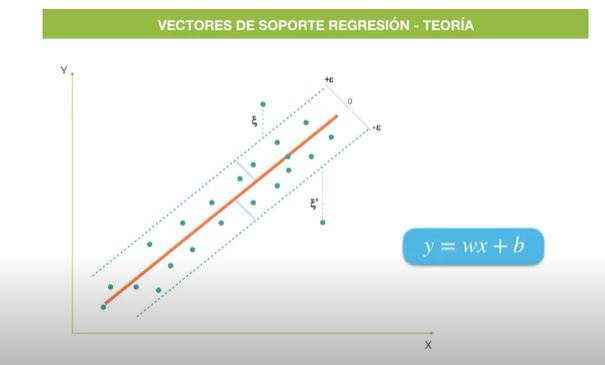

In [1]:
#Importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#IMPORTANDO LOS DATOS
casas = pd.read_csv("train.csv", sep=",")
casas.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Explorando datos
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

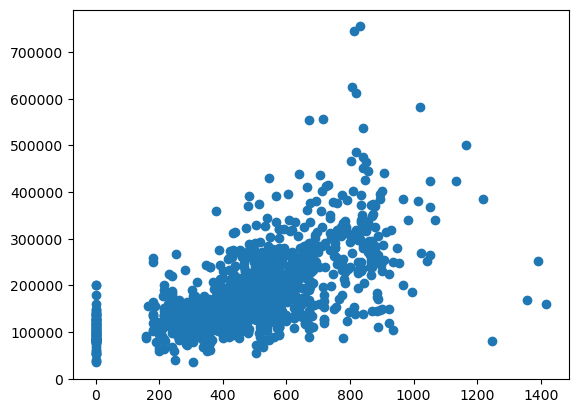

In [4]:
plt.scatter(casas["GarageArea"],casas["SalePrice"],)

# Separando Datos de Prueba y de Entrenamiento

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(casas["GarageArea"],casas["SalePrice"], test_size=0.3)

#Datos para graficar
data_graf_train = pd.DataFrame({"x_train":x_train, "y_train":y_train})
data_graf_test = pd.DataFrame({"x_test":x_test, "y_test":y_test})

#PARA ESTA FUNCION X SE PASA EN 2D Y "Y" EN 1D
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

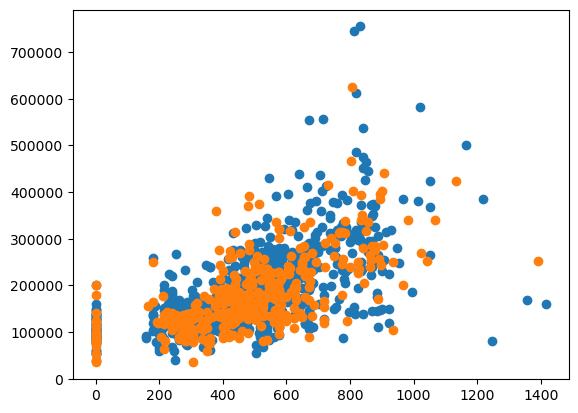

In [9]:
data_graf_train.sort_values("x_train")
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

## Definiendo el Algoritmo a usar

In [10]:
from sklearn.svm import SVR
svr = SVR(kernel="linear", C=1.0, epsilon=0.2)

#kernel= Puede ser "linear", "poly", "rbf", "sigmoid"
#C= determina el equilibrio entre la regularidad de la funcion y la cuantia hasta la cual toleramos desviaciones mayores a las de las bandas de soporte
#epsilon = error cometido en la aprocimacion hasta las bandas

## Entrenando el Modelo

In [11]:
svr.fit(x_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [12]:
y_predict = svr.predict(x_test)

In [13]:
data_graf_test["y_predict"] = y_predict
data_graf_test.sort_values("x_test")

,x_test,y_test,y_predict
241,0,110500,78698.433790
1131,0,93500,78698.433790
750,0,96500,78698.433790
148,0,141000,78698.433790
464,0,124000,78698.433790
...,...,...,...
317,1025,270000,285334.689498
1087,1043,252000,288963.423744
1417,1069,340000,294204.928767
664,1134,423000,307308.691324


## Graficando el Modelo

Text(0.5, 1.0, 'Área de la Casa vs Precio de Venta')

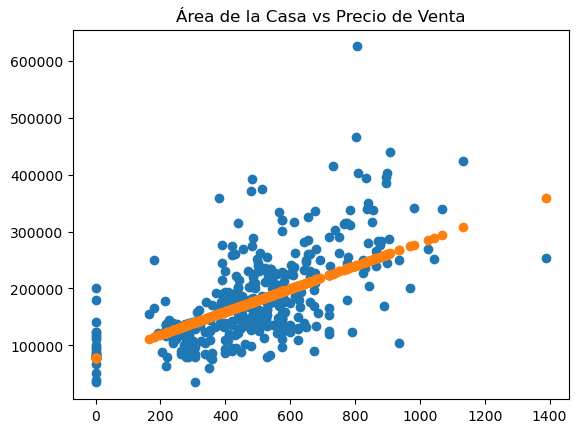

In [14]:
plt.scatter(data_graf_test["x_test"], data_graf_test["y_test"])
plt.scatter(data_graf_test["x_test"], data_graf_test["y_predict"])
plt.title("Área de la Casa vs Precio de Venta")

# Precision del modelo

In [15]:
svr.score(x_train, y_train)

0.36361552497780125